In [14]:
#importing libraries
import pandas as pd
from molmass import Formula
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#uploading the MS spectra file (txt)
file = input('Import the MS spectra file to work with (comma separated values): ')
df = pd.read_csv(file, sep='\t', engine='python')

Import the MS spectra file to work with (comma separated values): test.txt


In [25]:
#asking for the formula bruta of the molecule to look for
f = input ('Write the formula bruta of the molecule you are looking for: ')
form = Formula(f)
MW = form.isotope.mass

Write the formula bruta of the molecule you are looking for: C9H14N4O3


In [26]:
#Indicate if the data are acquired in positive or negative ion mode
h_weigh=1.007276
word = ''
while word.lower() != 'out':
    pos_neg = input ('Indicate if the analysis was carried out in positive or negative ion mode (p/n): ')
    if pos_neg == 'p':
        word = 'out'
    elif pos_neg == 'n':
        word = 'out'
    else:
        pass
    
if pos_neg.startswith('p'):
    molecular_ion = (round((MW + h_weigh),2))
    pos_neg2 = 'positive'
else:
    molecular_ion = (round((MW - h_weigh),2))
    pos_neg2 = 'negative'

Indicate if the analysis was carried out in positive or negative ion mode (p/n): p


In [27]:
print ('Your have insert the formula:',f,'\nwith the monoisotopic mass of:',str(round(MW,2)),'\nand a molecular ion of: ',str(molecular_ion),'\nin',pos_neg2,'ion mode')

Your have insert the formula: C9H14N4O3 
with the monoisotopic mass of: 226.11 
and a molecular ion of:  227.11 
in positive ion mode


In [28]:
#define list of possible molecular ion [e.g. Na+ - K+ - 2M+H+ -etc... ]
if pos_neg == 'p':
    ammonium = round((molecular_ion + 17.0),2) 
    sodium = round((molecular_ion + 22.0),2)
    potassium = round((molecular_ion + 38.1),2)
    bi_charge = round(((molecular_ion + h_weigh)/2),2)
    bi_molecule = round((molecular_ion + (molecular_ion-1)),2)
    search = [molecular_ion,ammonium,sodium,potassium,bi_charge,bi_molecule]
elif pos_neg == 'n':
    water = round((molecular_ion + 18),2)
    formate = round((molecular_ion + 46 ),2)
    bi_charge = round(((molecular_ion - h_weigh)/2),2)
    bi_molecule = round((molecular_ion + (molecular_ion+h_weigh)),2)
    search_neg = [molecular_ion,water, formate, bi_charge, bi_molecule]
else:
    pass

In [29]:
#identify the value with the maximum intensity
def maximum(intensity):
    max_value = max(intensity)
    ind = ab[max_value]
    ident_value = (df['X'][ind])
    accuracy = round((y-ident_value),2)
    return ident_value, max_value, accuracy

In [31]:
# define the accuracy of the search
decision = 'n'
while decision.lower() != 'y':
    if decision == 'yes':
        break
    else:
        lowe_res = input('With wich accuracy you want to run the analysis (Da) (e.g. 0.5): ')
        print (lowe_res)
        decision = input ('do you confirm your input (y/n)')

With wich accuracy you want to run the analysis (Da) (e.g. 0.5): 0.5
0.5
do you confirm your input (y/n)y


In [32]:
#searching for the values, and put in a dictionary the detected peaks and the accuracy from the theoretical mass
results = dict()
for y in search:
    lower = y - float(lowe_res)
    higher = y + float(lowe_res)
    values = []
    for x in np.arange(lower,higher,0.01):
        for z in df['X']:
            if str(round(z,2)) == str(round(x,2)):
                values.append(z)
            else:
                pass
    if values == []:
        results[y] = ['n/a','n/a','n/a']
    else:
        index = []
        for a in values:
            index.append(int((df[df['X']== a].index.values)))
        intensity = []
        ab = dict()
        for b in index:
            ab[df['Y'][b]] = b
            intensity.append(df['Y'][b])
        results[y] = maximum(intensity)

In [33]:
if pos_neg == 'p':
    peaks = pd.DataFrame.from_dict(results, orient = 'index', columns = ['Peak', 'Intensity','Accuracy(Da)'])
    peaks['Values'] = search
    peaks['Search'] = ['[M+H]+','[M+NH3]+','[M+Na]+','[M+K]+','[M+2H]2+','[2M+H]+']
    peaks['Index'] = [0,1,2,3,4,5]
    peaks = peaks.set_index('Index')
    cols = list(peaks)
    cols.insert(0,cols.pop(cols.index('Search')))
    cols.insert(1,cols.pop(cols.index('Values')))
    peaks = peaks.loc[:,cols]
else:
    peaks = pd.DataFrame.from_dict(results, orient = 'index', columns = ['Peak', 'Intensity','Accuracy(Da)'])
    peaks['Values'] = search_neg
    peaks['Search'] = ['[M-H]-','[M+OH]-','[M+HCOO]-','[M-2H]2-','[2M-H]-']
    peaks['Index'] = [0,1,2,3,4,]
    peaks = peaks.set_index('Index')
    cols = list(peaks)
    cols.insert(0,cols.pop(cols.index('Search')))
    cols.insert(1,cols.pop(cols.index('Values')))
    peaks = peaks.loc[:,cols]

peaks

,Search,Values,Peak,Intensity,Accuracy(Da)
Index,,,,,
0,[M+H]+,227.11,227.3,129681608.0,-0.19
1,[M+NH3]+,244.11,244.2,702117.0,-0.09
2,[M+Na]+,249.11,249.2,840140.0,-0.09
3,[M+K]+,265.21,265.5,582097.0,-0.29
4,[M+2H]2+,114.06,114.1,105281544.0,-0.04
5,[2M+H]+,453.22,453.3,16394732.0,-0.08


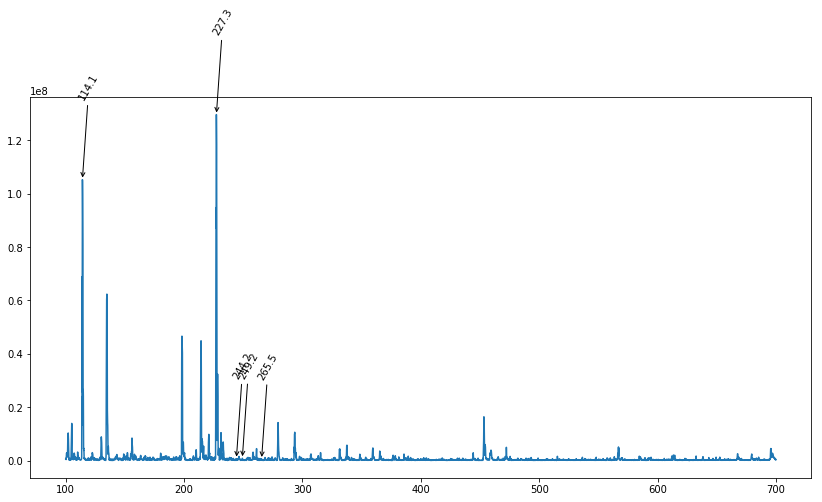

In [34]:
x = df['X']
y = df['Y']
fig,ax= plt.subplots(figsize=(14, 7))
plt.plot(x,y)
n=0
nn=0.1
for signal in range(5):
    if peaks['Peak'][signal] == 'n/a':
        n+=1
    else:
        ax.annotate((peaks['Peak'][n]),
                    xy=((peaks['Peak'][n]), (peaks['Intensity'][n])), xycoords='data', xytext=(-5, 100), textcoords='offset points',rotation = 60,
            arrowprops=dict(arrowstyle="->"))
        n+=1
        nn+=0.1
plt.show()
plt.close()